In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                  train=True,
                                                  transform = torchvision.transforms.ToTensor(),
                                                 download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                 train=False,
                                                transform = torchvision.transforms.ToTensor())

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset,
                                         batch_size = batch_size,
                                        shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size = batch_size,
                                         shuffle = True)

torch.Size([1, 28, 28])


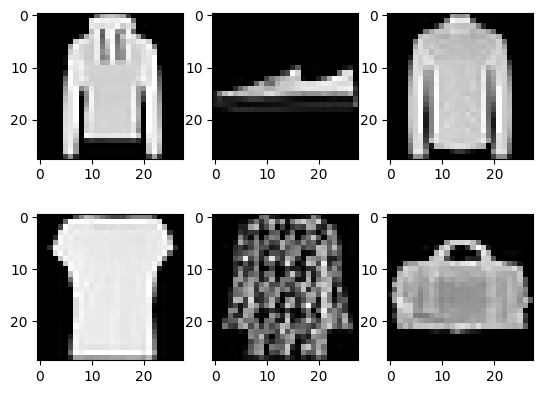

In [4]:
examples = iter(test_loader)
example_data, example_target = next(examples)
# example_data consist of total 500 images
print(example_data[0].shape)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')

In [5]:
import torch.nn as nn
import torch.nn.functional as F
class NeuralNet(nn.Module):
    def __init__(self, input_size = 784, hidden_size = 500, n_classes = 10):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, n_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        return out
model = NeuralNet()

In [6]:
lr = 0.001
loss_criterea = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [7]:
epochs = 100
losses = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28* 28)
        preds = model(images)
        loss = loss_criterea(preds, labels)
        losses.append(loss.data.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
        
    print(f'[{epoch + 1}] loss: {loss.data.item():.3f}')

[1] loss: 0.409
[2] loss: 0.418
[3] loss: 0.244
[4] loss: 0.177
[5] loss: 0.232
[6] loss: 0.148
[7] loss: 0.270
[8] loss: 0.411
[9] loss: 0.163
[10] loss: 0.191
[11] loss: 0.133
[12] loss: 0.124
[13] loss: 0.193
[14] loss: 0.107
[15] loss: 0.203
[16] loss: 0.049
[17] loss: 0.211
[18] loss: 0.212
[19] loss: 0.170
[20] loss: 0.113
[21] loss: 0.104
[22] loss: 0.171
[23] loss: 0.264
[24] loss: 0.054
[25] loss: 0.175
[26] loss: 0.025
[27] loss: 0.050
[28] loss: 0.038
[29] loss: 0.071
[30] loss: 0.174
[31] loss: 0.198
[32] loss: 0.078
[33] loss: 0.152
[34] loss: 0.045
[35] loss: 0.074
[36] loss: 0.172
[37] loss: 0.176
[38] loss: 0.112
[39] loss: 0.057
[40] loss: 0.030
[41] loss: 0.043
[42] loss: 0.091
[43] loss: 0.024
[44] loss: 0.007
[45] loss: 0.016
[46] loss: 0.049
[47] loss: 0.011
[48] loss: 0.136
[49] loss: 0.022
[50] loss: 0.323
[51] loss: 0.097
[52] loss: 0.172
[53] loss: 0.089
[54] loss: 0.044
[55] loss: 0.132
[56] loss: 0.078
[57] loss: 0.036
[58] loss: 0.049
[59] loss: 0.065
[60] l

In [8]:
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28* 28)

        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()


    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

Accuracy of the model: 89.08 %
